<a href="https://colab.research.google.com/github/tlkt/mofan_work/blob/master/classifation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [0]:
n_data = torch.ones(100,2)

In [0]:
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)


In [0]:
x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1),0).type(torch.LongTensor)
x,y = Variable(x),Variable(y)

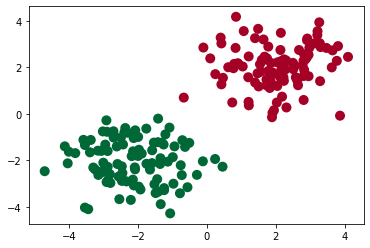

In [19]:
plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y.data.numpy(),s=100,lw=0,cmap='RdYlGn')
plt.show()

In [0]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [0]:
net = Net(2,10,2)

In [0]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.01)

In [0]:
loss_func = torch.nn.CrossEntropyLoss()

In [0]:
plt.ion()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


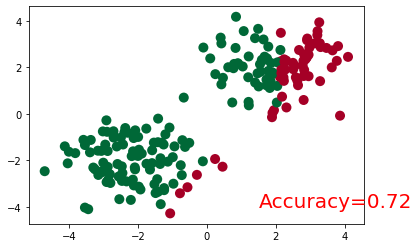

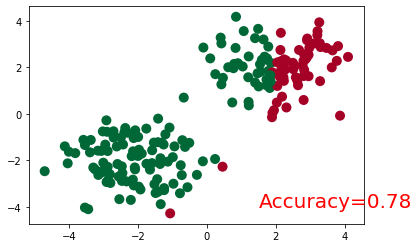

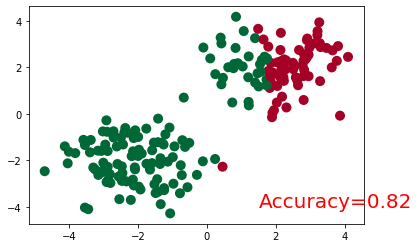

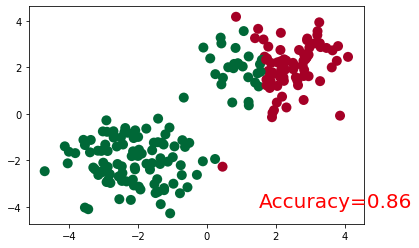

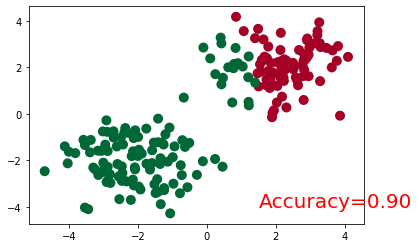

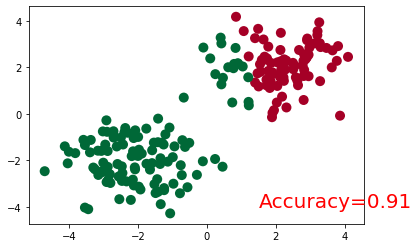

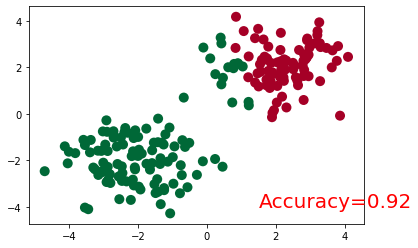

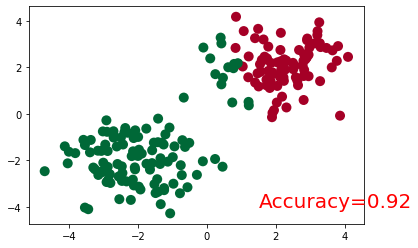

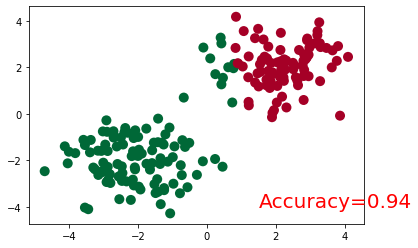

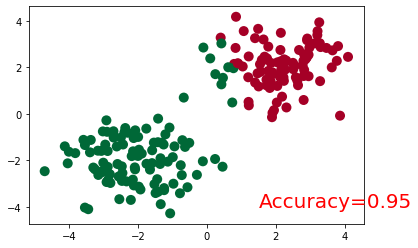

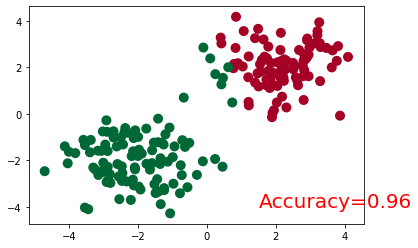

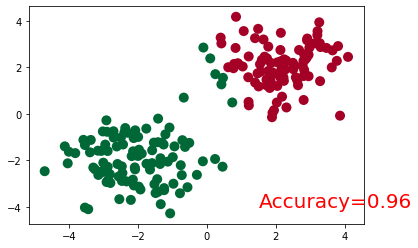

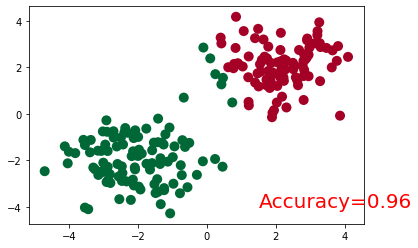

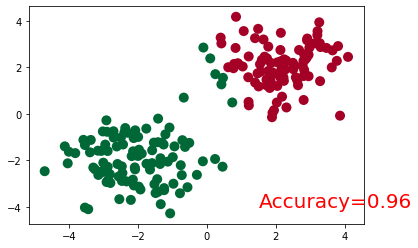

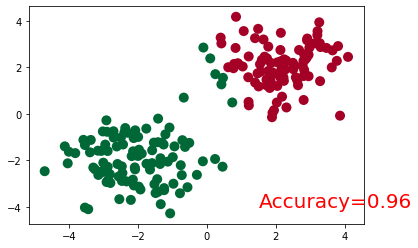

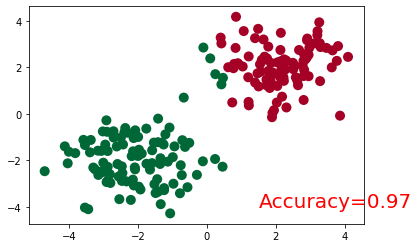

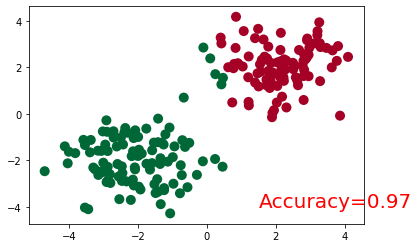

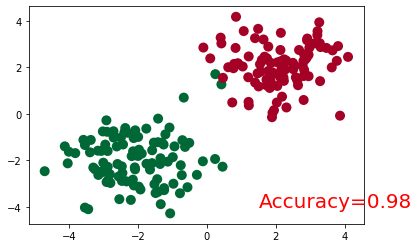

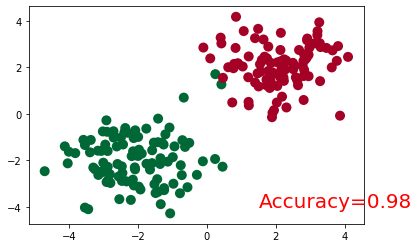

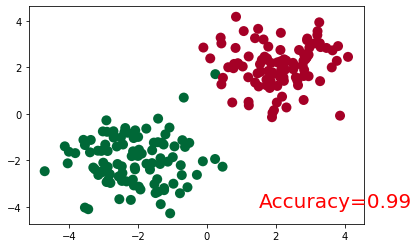

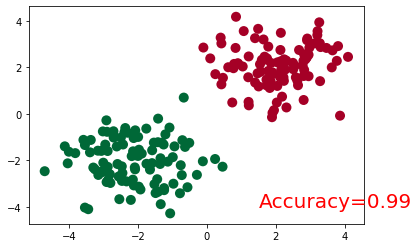

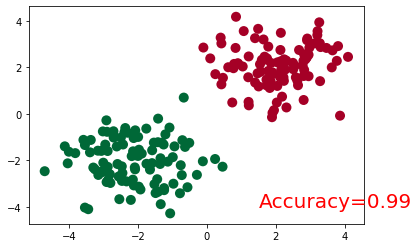

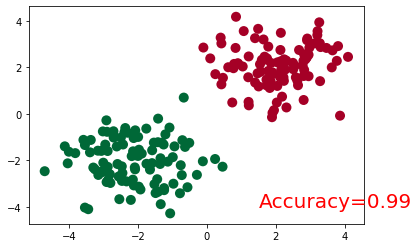

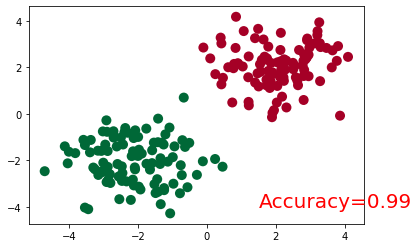

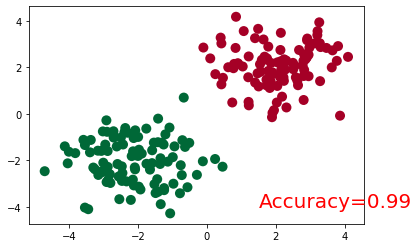

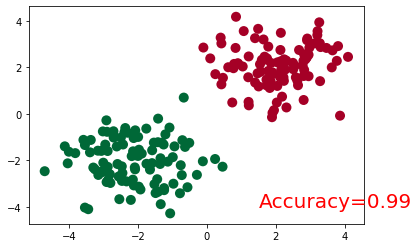

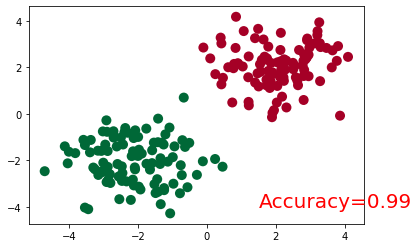

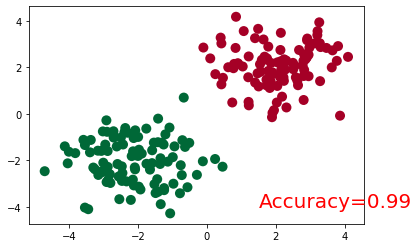

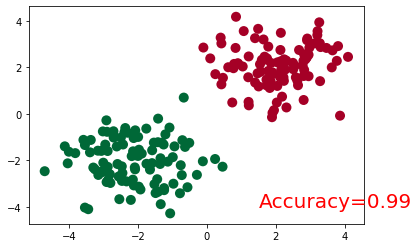

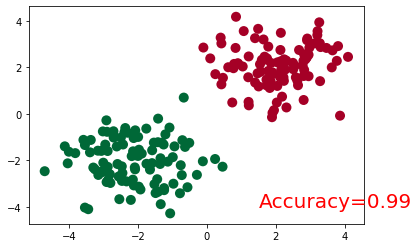

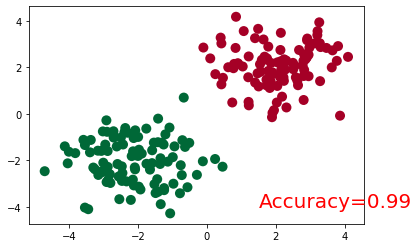

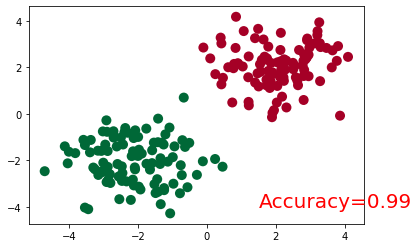

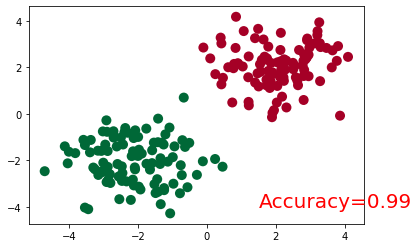

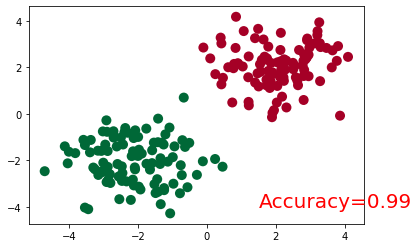

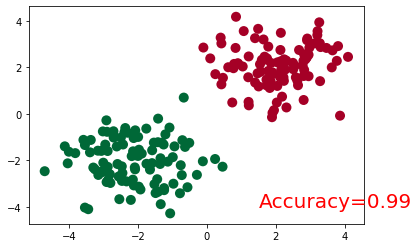

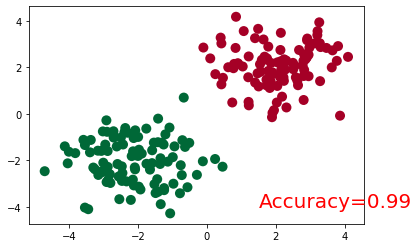

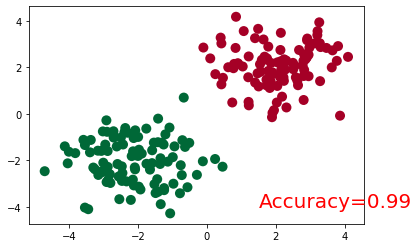

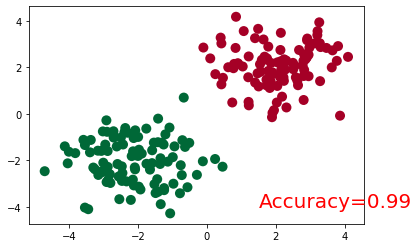

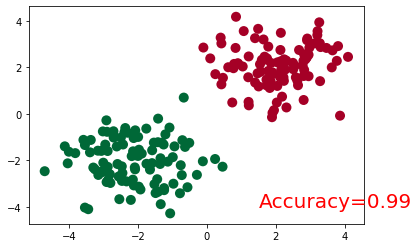

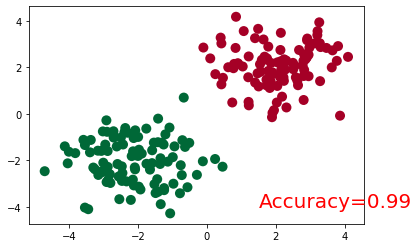

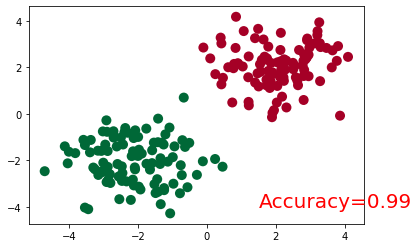

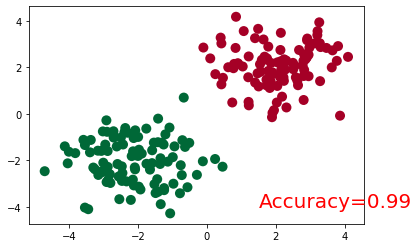

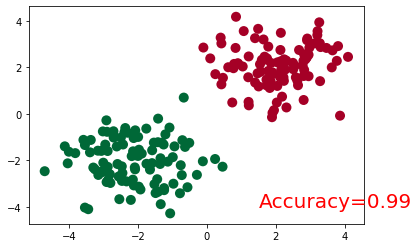

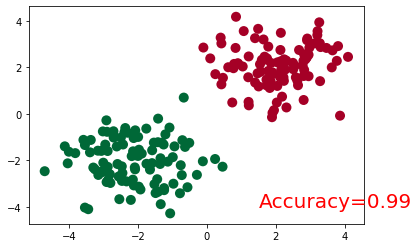

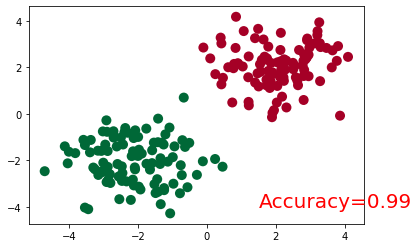

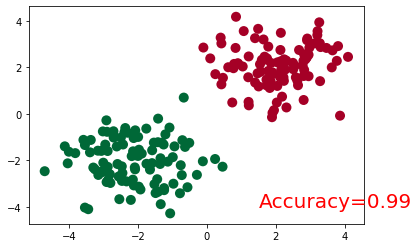

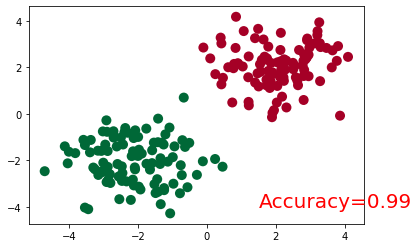

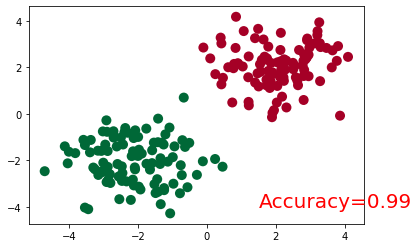

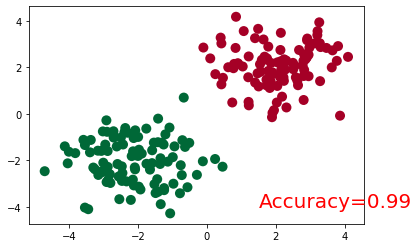

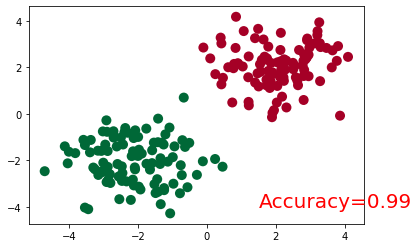

In [25]:
for t in range(100):
  out = net(x)
  loss = loss_func(out,y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if t%2 ==0:
    plt.cla()
    prediction = torch.max(F.softmax(out), 1)[1]
    pred_y = prediction.data.numpy().squeeze()
    target_y = y.data.numpy()
    plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
    accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color': 'red'})
    plt.pause(0.1)

plt.ioff()
plt.show()